In [39]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import utils

In [77]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [99]:
data["index"] = data.index
data

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count,index
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000,48321
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147,48324
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000,48327
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438,48330
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585,48333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,6.100319,929175
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,4.983607,929178
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,5.389072,929181
929184,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,"48.83977,2.30198",Y2H20114504,48.839770,2.301980,3.091042,929184


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [35]:
data.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    998
date                         8974
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                998
dtype: int64

In [36]:
start_date = data["date"].min()
end_date = data["date"].max()
print(start_date, end_date)

2020-09-01 01:00:00 2021-09-09 23:00:00


In [81]:
full_data =  utils._merge_external_data(data, is_train=True)

In [83]:
full_data.head()

,counter_name,bike_count,date,counter_installation_date,latitude,longitude,log_bike_count,Sea Level Pressure (hPa),Pressure Tendency (hPa/3h),Pressure Tendency Code,...,New Snow Depth (cm),New Snowfall Duration (hours),"Rainfall (1h, mm)","Rainfall (3h, mm)","Rainfall (6h, mm)","Rainfall (12h, mm)","Rainfall (24h, mm)",Layer 1 Cloud Cover (oktas),Layer 1 Cloud Type,Layer 1 Cloud Base Height (m)
0,28 boulevard Diderot O-E,1.0,2020-09-01 01:00:00,2013-01-18,48.846028,2.375429,0.693147,102050,-10,8,...,0.0,-60.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4000.0
1,Face au 8 avenue de la porte de Charenton SE-NO,1.0,2020-09-01 01:00:00,2019-11-01,48.830331,2.400551,0.693147,102050,-10,8,...,0.0,-60.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4000.0
2,Face 104 rue d'Aubervilliers S-N,1.0,2020-09-01 01:00:00,2018-11-29,48.890457,2.368852,0.693147,102050,-10,8,...,0.0,-60.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4000.0
3,90 Rue De Sèvres NE-SO,21.0,2020-09-01 01:00:00,2020-07-22,48.846380,2.315290,3.091042,102050,-10,8,...,0.0,-60.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4000.0
4,Face au 4 avenue de la porte de Bagnolet E-O,2.0,2020-09-01 01:00:00,2019-11-06,48.864610,2.409690,1.098612,102050,-10,8,...,0.0,-60.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4000.0


In [94]:
file_path = "data/external_data.csv"
df_ext = pd.read_csv(file_path, parse_dates=["date"])
df_ext = utils._column_rename(df_ext)

In [96]:
df_ext["date"] = pd.to_datetime(df_ext["date"], errors="coerce").astype(
    "datetime64[ns]"
)
# df_ext = df_ext.sort_values(by=["date"], ascending=True)
df_ext = df_ext.sort_values("date").reset_index(drop=True)
df_ext.head()

,Station Number,date,Sea Level Pressure (hPa),Pressure Tendency (hPa/3h),Pressure Tendency Code,Wind Direction (°),Wind Speed (m/s),Air Temperature (°C),Dew Point Temperature (°C),Relative Humidity (%),...,Layer 1 Cloud Base Height (m),Layer 2 Cloud Cover (oktas),Layer 2 Cloud Type,Layer 2 Cloud Base Height (m),Layer 3 Cloud Cover (oktas),Layer 3 Cloud Type,Layer 3 Cloud Base Height (m),Layer 4 Cloud Cover (oktas),Layer 4 Cloud Type,Layer 4 Cloud Base Height (m)
0,7149,2020-09-01 00:00:00,102050,-10,8,340,1.6,285.75,282.55,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2020-09-01 03:00:00,101990,-60,6,290,1.1,283.95,282.05,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2020-09-01 06:00:00,102000,10,3,360,1.8,284.25,282.85,91,...,4000.0,1.0,0.0,7500.0,NaN,NaN,NaN,NaN,NaN,NaN
3,7149,2020-09-01 09:00:00,101970,0,5,360,2.9,291.25,283.35,60,...,950.0,1.0,3.0,4500.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2020-09-01 12:00:00,101850,-110,6,40,2.6,293.95,281.25,44,...,1410.0,5.0,NaN,2160.0,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
data = data.sort_values("date")

In [104]:
data = pd.merge_asof(data, df_ext, on="date", direction="nearest")
data.index = data["index"]
data

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,...,Layer 1 Cloud Base Height (m),Layer 2 Cloud Cover (oktas),Layer 2 Cloud Type,Layer 2 Cloud Base Height (m),Layer 3 Cloud Cover (oktas),Layer 3 Cloud Type,Layer 3 Cloud Base Height (m),Layer 4 Cloud Cover (oktas),Layer 4 Cloud Type,Layer 4 Cloud Base Height (m)
index,,,,,,,,,,,,,,,,,,,,,
57884,100007049-101007049,28 boulevard Diderot O-E,100007049,28 boulevard Diderot,1.0,2020-09-01 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343292,100047547-103047547,6 rue Julia Bartet SO-NE,100047547,6 rue Julia Bartet,2.0,2020-09-01 01:00:00,2018-11-28,"48.82636,2.30303",Y2H18086323,48.826360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569035,100056047-SC,Pont de la Concorde S-N,100056047,Pont de la Concorde S-N,1.0,2020-09-01 01:00:00,2019-11-08,"48.86378,2.32003",Y2H19070356,48.863780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333389,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,4.0,2020-09-01 01:00:00,2018-11-28,"48.82636,2.30303",Y2H18086323,48.826360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578145,100056223-SC,Pont des Invalides N-S,100056223,Pont des Invalides N-S,2.0,2020-09-01 01:00:00,2019-11-07,"48.86284,2.310345",Y2H19070365,48.862840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577945,100056047-SC,Pont de la Concorde S-N,100056047,Pont de la Concorde S-N,24.0,2021-09-09 23:00:00,2019-11-08,"48.86378,2.32003",Y2H19070356,48.863780,...,5340.0,8.0,NaN,7020.0,NaN,NaN,NaN,NaN,NaN,NaN
656059,100056329-103056329,Pont Charles De Gaulle SO-NE,100056329,Pont Charles De Gaulle,10.0,2021-09-09 23:00:00,2019-12-12,"48.84223,2.36811",Y2H19070375,48.842230,...,5340.0,8.0,NaN,7020.0,NaN,NaN,NaN,NaN,NaN,NaN
773333,100056336-105056336,27 quai de la Tournelle SE-NO,100056336,27 quai de la Tournelle,53.0,2021-09-09 23:00:00,2019-11-14,"48.85013,2.35423",Y2H19070383,48.850130,...,5340.0,8.0,NaN,7020.0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data["counter_name"].unique()

['28 boulevard Diderot E-O', '28 boulevard Diderot O-E', '39 quai François Mauriac NO-SE', '39 quai François Mauriac SE-NO', '18 quai de l'Hôtel de Ville NO-SE', ..., '90 Rue De Sèvres SO-NE', '20 Avenue de Clichy NO-SE', '20 Avenue de Clichy SE-NO', '254 rue de Vaugirard NE-SO', '254 rue de Vaugirard SO-NE']
Length: 56
Categories (56, object): ['152 boulevard du Montparnasse E-O', '152 boulevard du Montparnasse O-E', '18 quai de l'Hôtel de Ville NO-SE', '18 quai de l'Hôtel de Ville SE-NO', ..., 'Totem Cours la Reine E-O', 'Totem Cours la Reine O-E', 'Voie Georges Pompidou NE-SO', 'Voie Georges Pompidou SO-NE']

/var/folders/mj/kcf7qyqx3tscrsshg63cxj380000gn/T/ipykernel_43705/1678184817.py:4: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data[mask].groupby(pd.Grouper(freq="1w", key="date"))[
/var/folders/mj/kcf7qyqx3tscrsshg63cxj380000gn/T/ipykernel_43705/1678184817.py:4: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data[mask].groupby(pd.Grouper(freq="1w", key="date"))[
/var/folders/mj/kcf7qyqx3tscrsshg63cxj380000gn/T/ipykernel_43705/1678184817.py:4: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data[mask].groupby(pd.Grouper(freq="1w", key="date"))[
/var/folders/mj/kcf7qyqx3tscrsshg63cxj380000gn/T/ipykernel_43705/1678184817.py:4: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  data[mask].groupby(pd.Grouper(freq="1w", key="date"))[
/var/folders/mj/kcf7qyqx3tscrsshg63cxj380000gn/T/ipy

<Figure size 400x800 with 0 Axes>

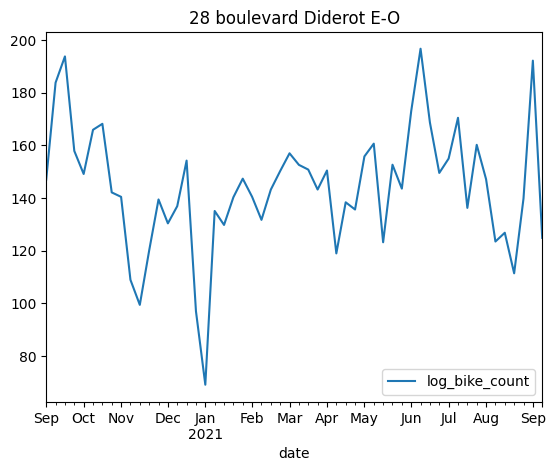

<Figure size 400x800 with 0 Axes>

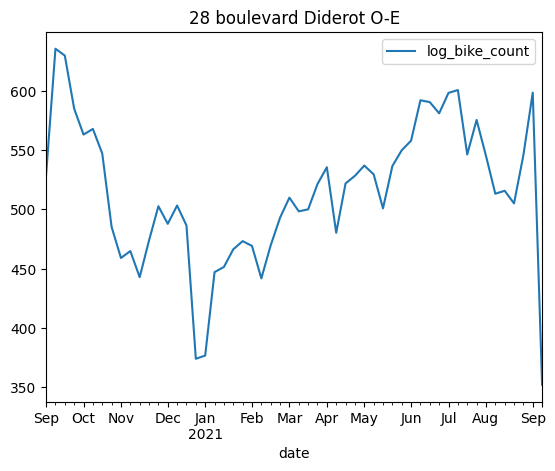

<Figure size 400x800 with 0 Axes>

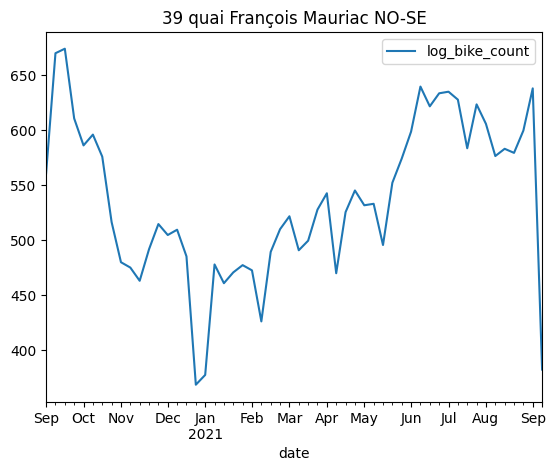

<Figure size 400x800 with 0 Axes>

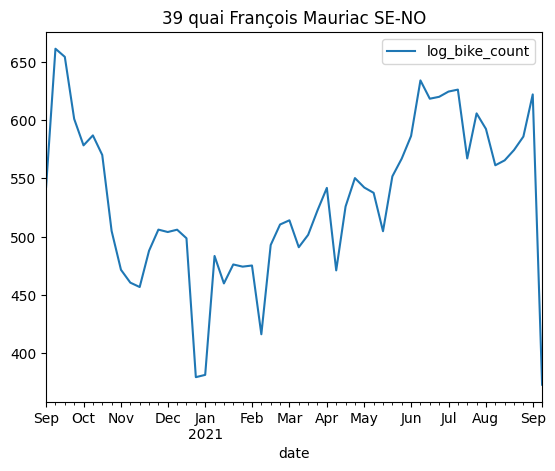

<Figure size 400x800 with 0 Axes>

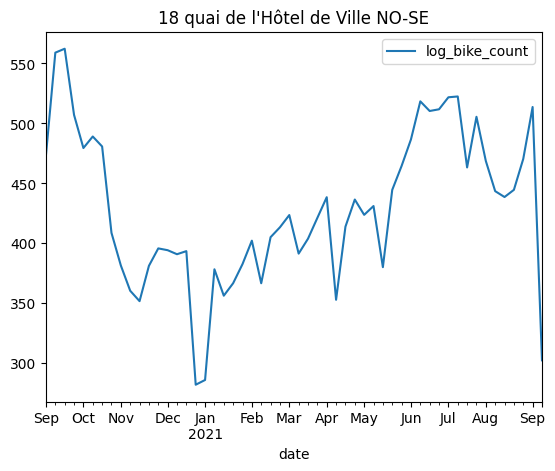

<Figure size 400x800 with 0 Axes>

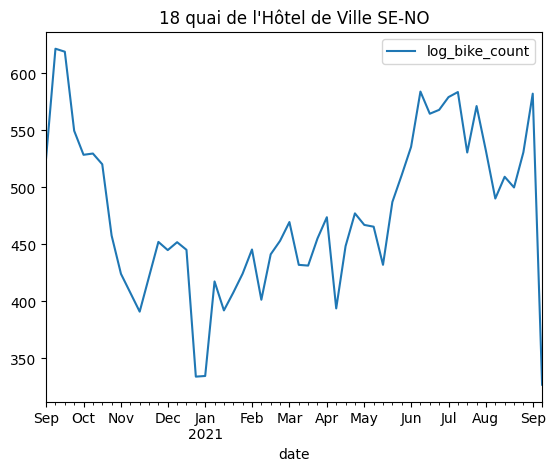

<Figure size 400x800 with 0 Axes>

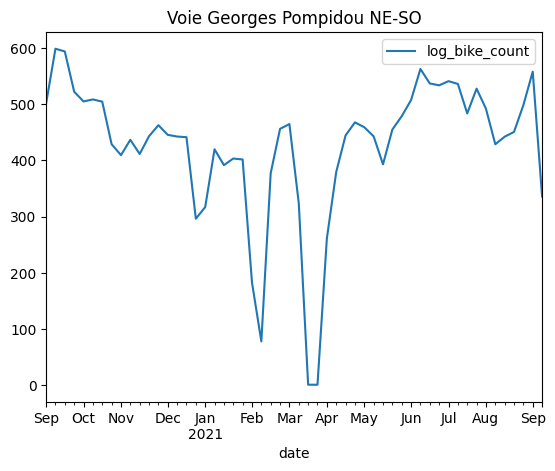

<Figure size 400x800 with 0 Axes>

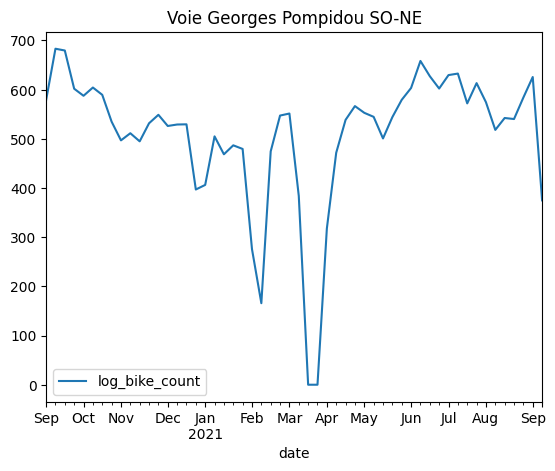

<Figure size 400x800 with 0 Axes>

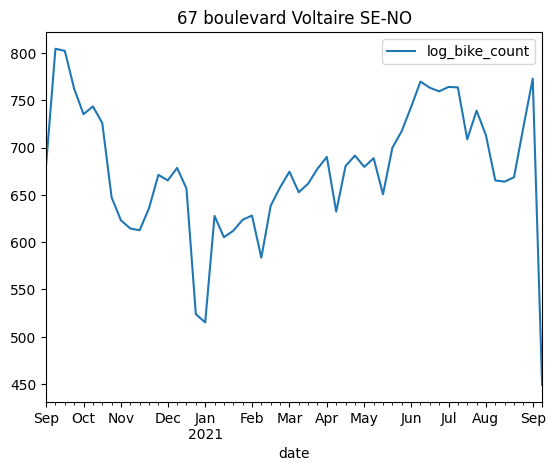

<Figure size 400x800 with 0 Axes>

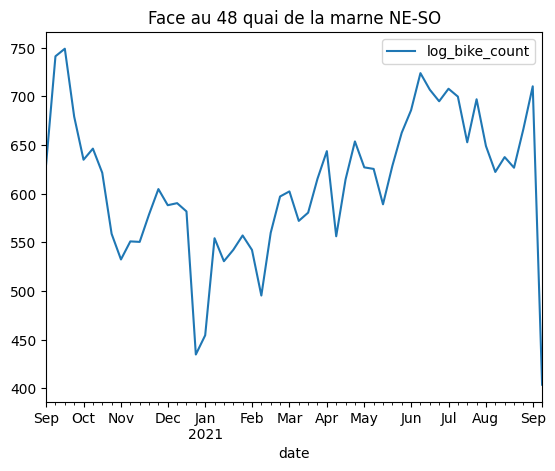

<Figure size 400x800 with 0 Axes>

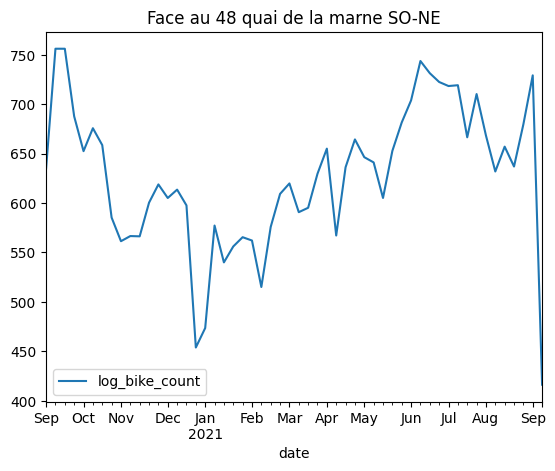

<Figure size 400x800 with 0 Axes>

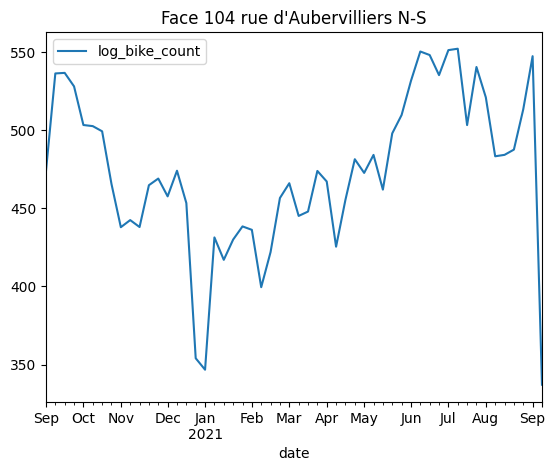

<Figure size 400x800 with 0 Axes>

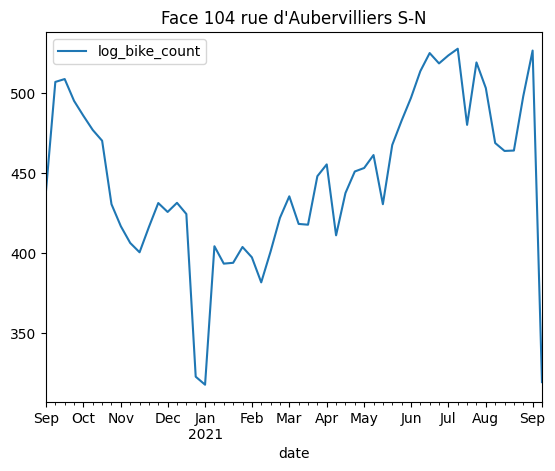

<Figure size 400x800 with 0 Axes>

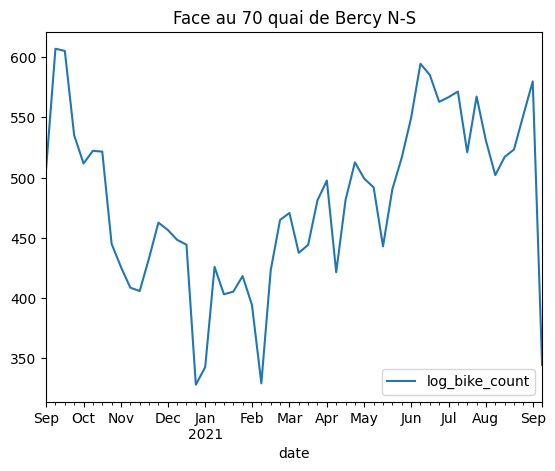

<Figure size 400x800 with 0 Axes>

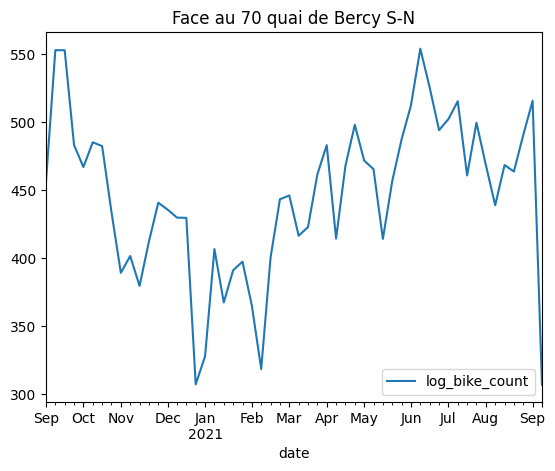

<Figure size 400x800 with 0 Axes>

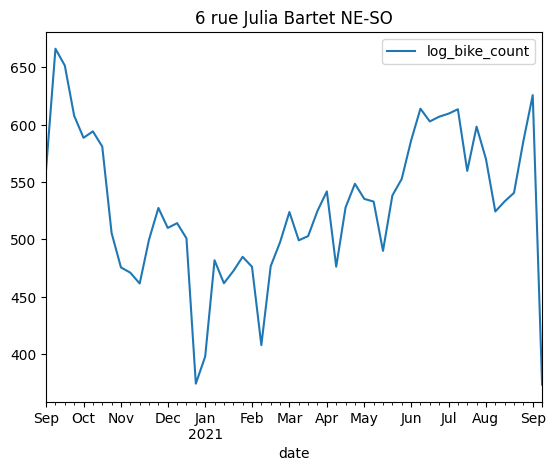

<Figure size 400x800 with 0 Axes>

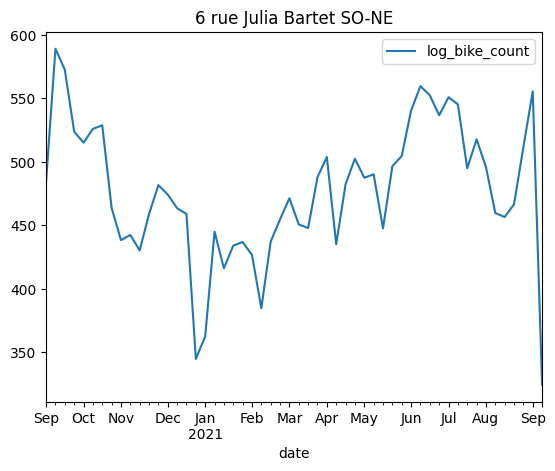

<Figure size 400x800 with 0 Axes>

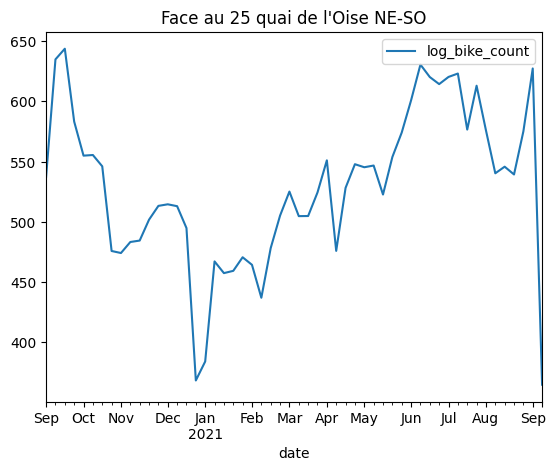

<Figure size 400x800 with 0 Axes>

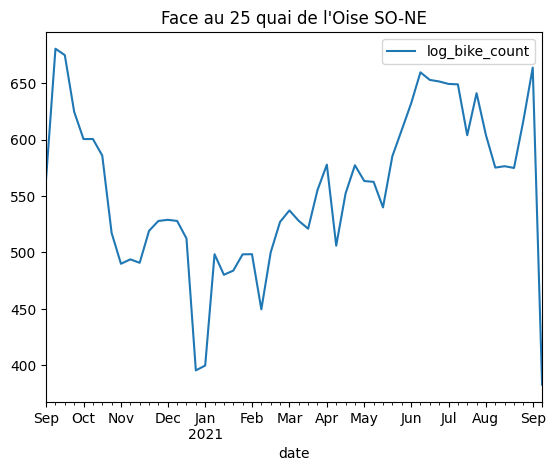

<Figure size 400x800 with 0 Axes>

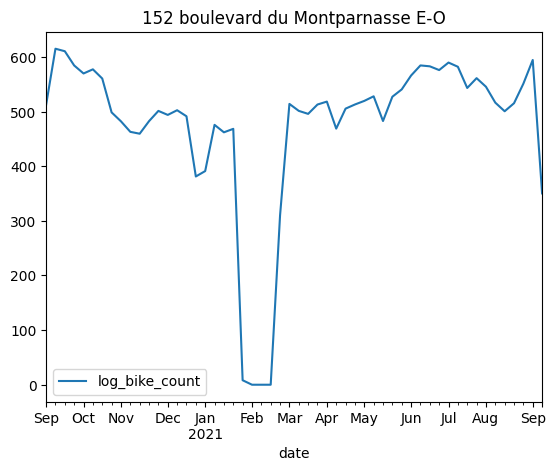

<Figure size 400x800 with 0 Axes>

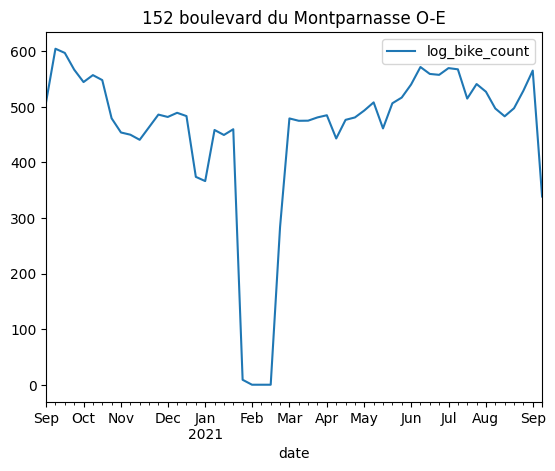

<Figure size 400x800 with 0 Axes>

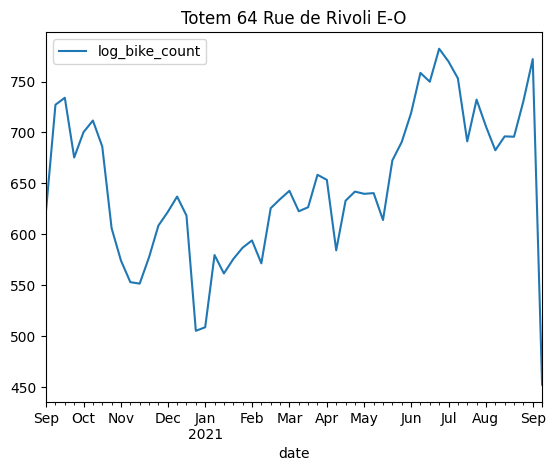

<Figure size 400x800 with 0 Axes>

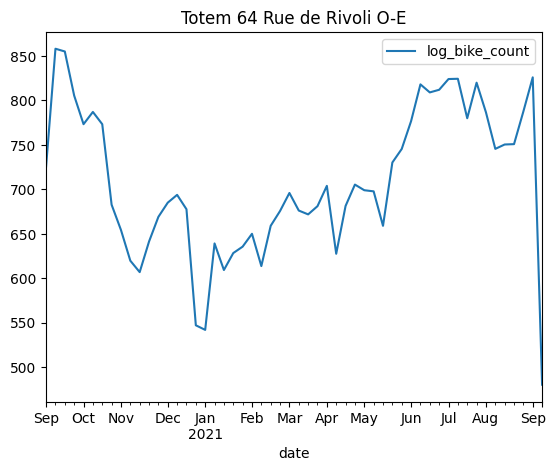

<Figure size 400x800 with 0 Axes>

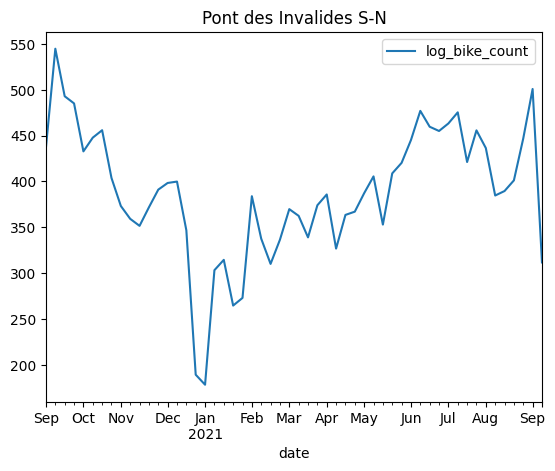

<Figure size 400x800 with 0 Axes>

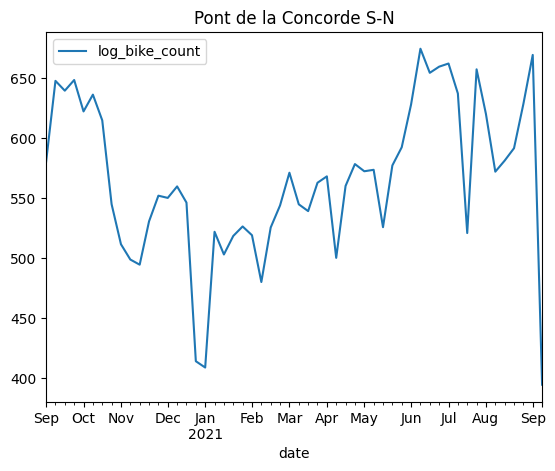

<Figure size 400x800 with 0 Axes>

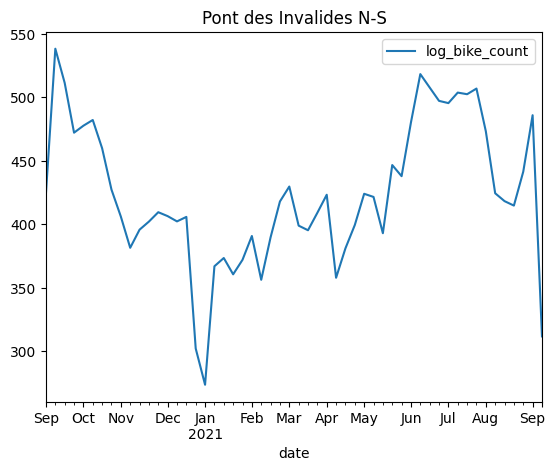

<Figure size 400x800 with 0 Axes>

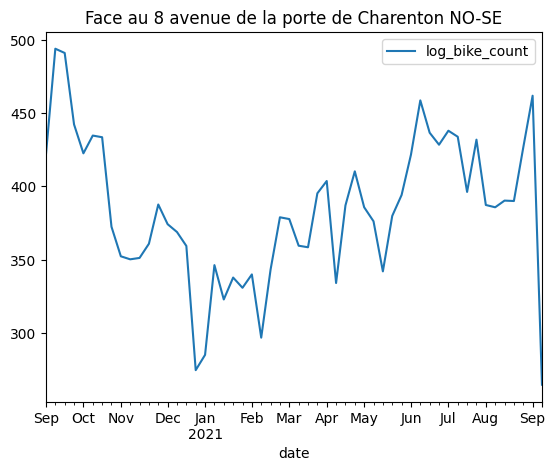

<Figure size 400x800 with 0 Axes>

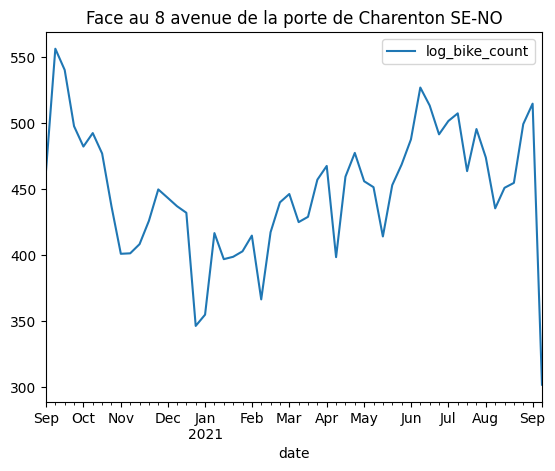

<Figure size 400x800 with 0 Axes>

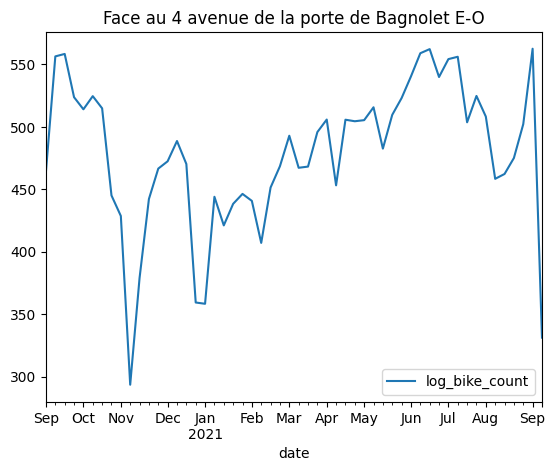

<Figure size 400x800 with 0 Axes>

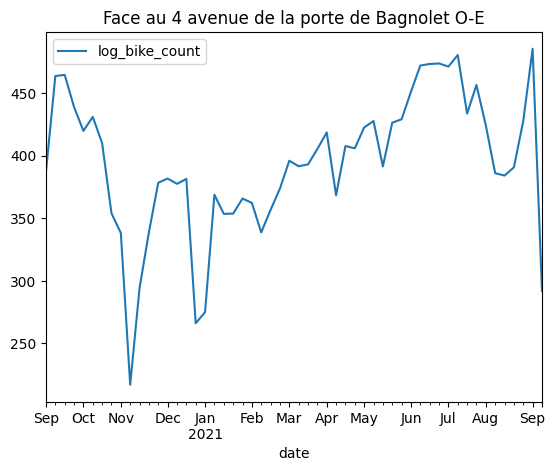

<Figure size 400x800 with 0 Axes>

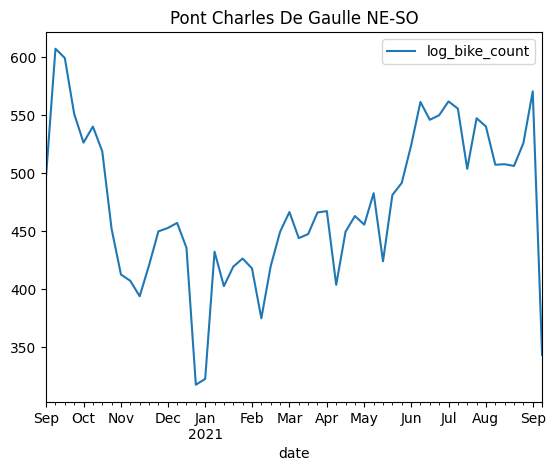

<Figure size 400x800 with 0 Axes>

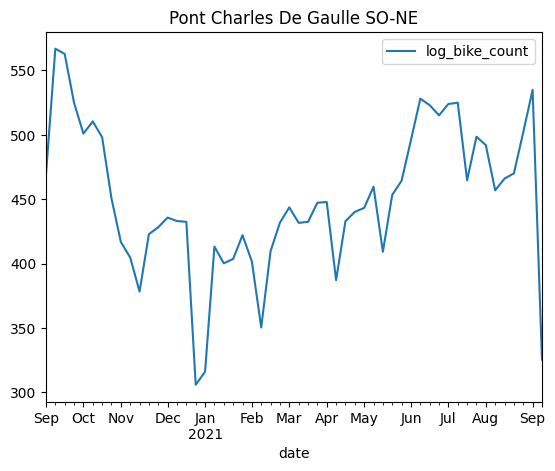

<Figure size 400x800 with 0 Axes>

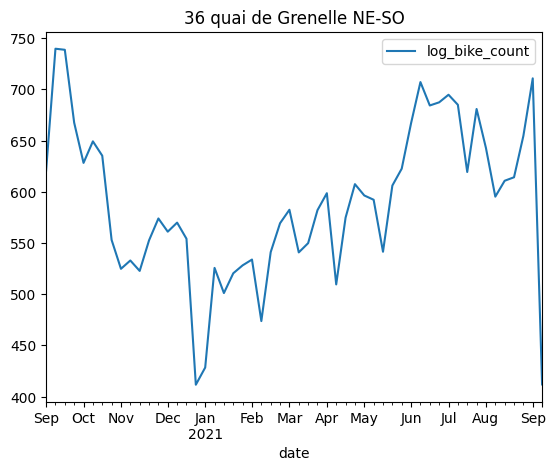

<Figure size 400x800 with 0 Axes>

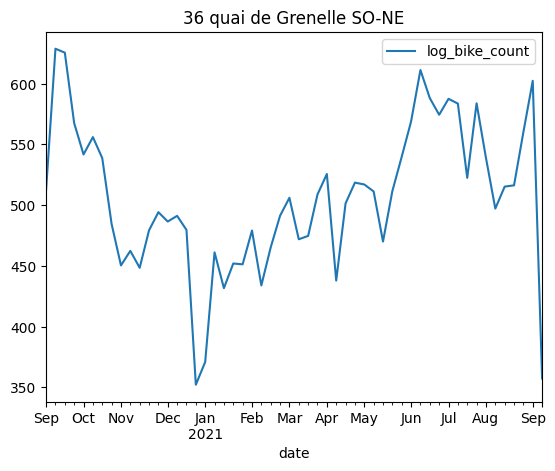

<Figure size 400x800 with 0 Axes>

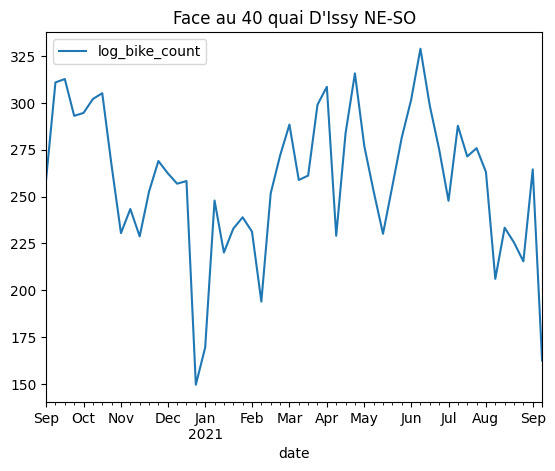

<Figure size 400x800 with 0 Axes>

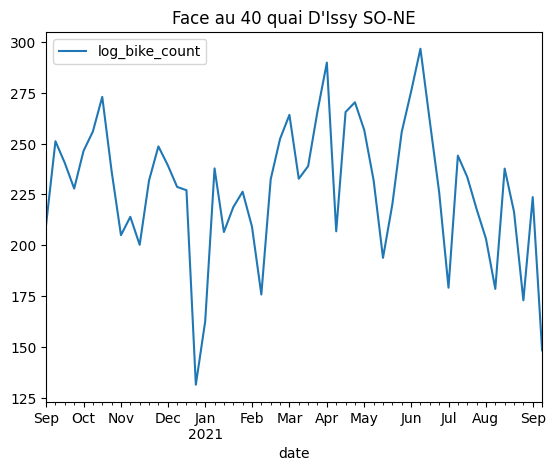

<Figure size 400x800 with 0 Axes>

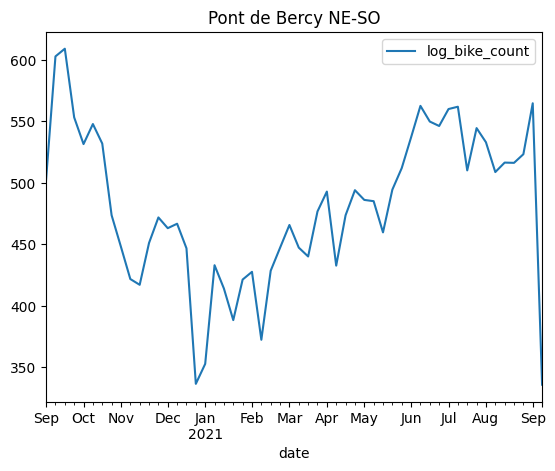

<Figure size 400x800 with 0 Axes>

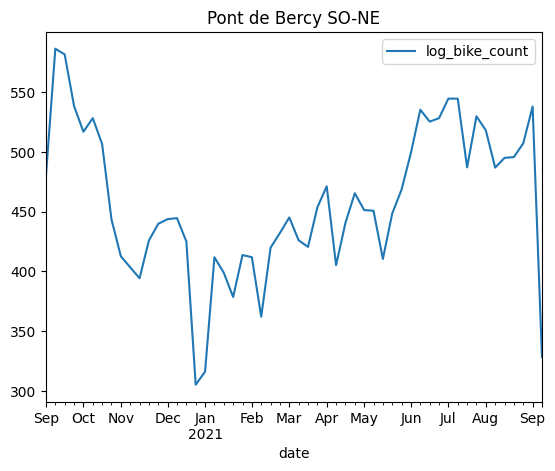

<Figure size 400x800 with 0 Axes>

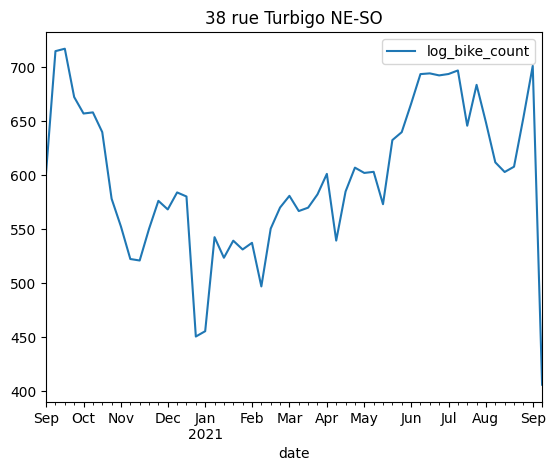

<Figure size 400x800 with 0 Axes>

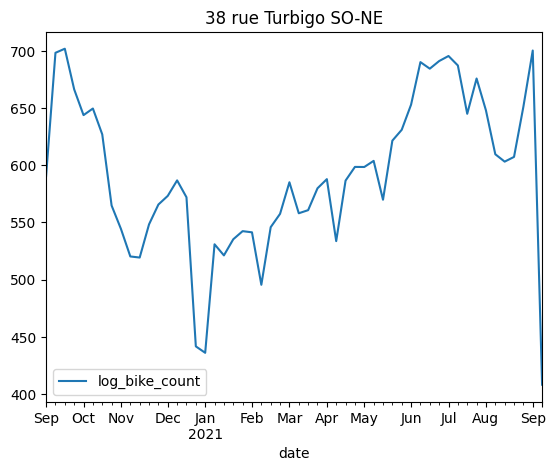

<Figure size 400x800 with 0 Axes>

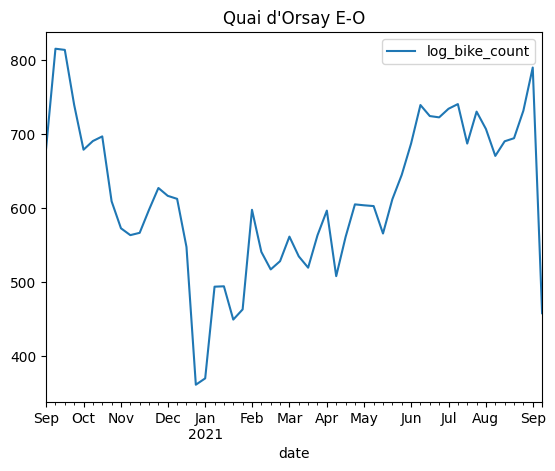

<Figure size 400x800 with 0 Axes>

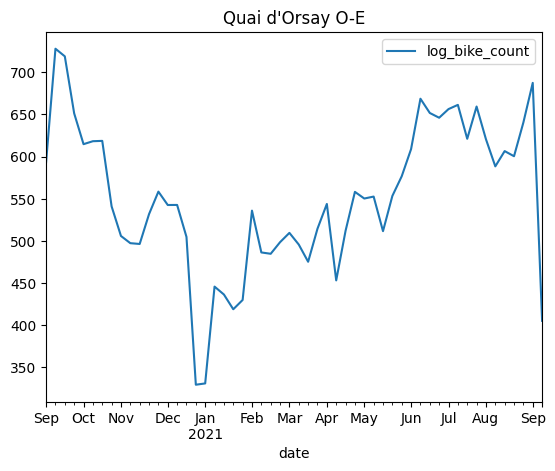

<Figure size 400x800 with 0 Axes>

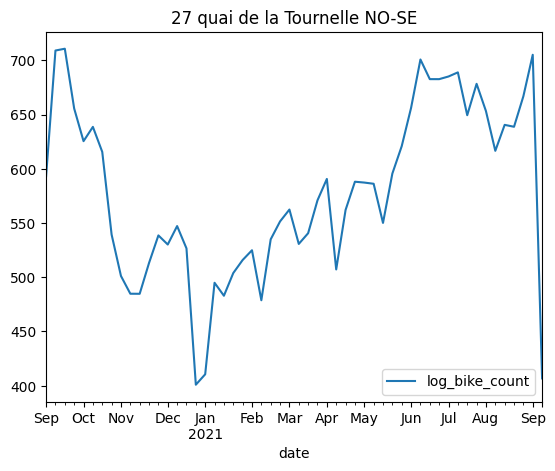

<Figure size 400x800 with 0 Axes>

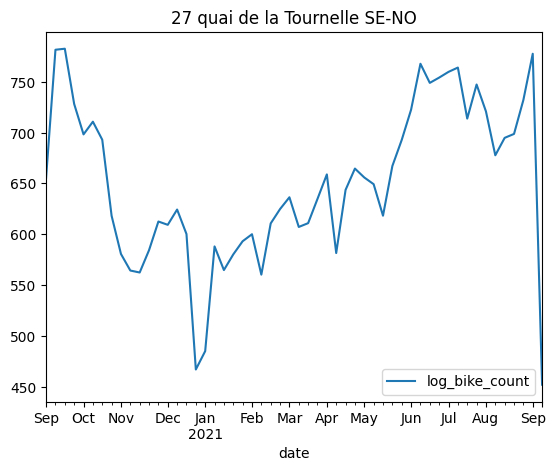

<Figure size 400x800 with 0 Axes>

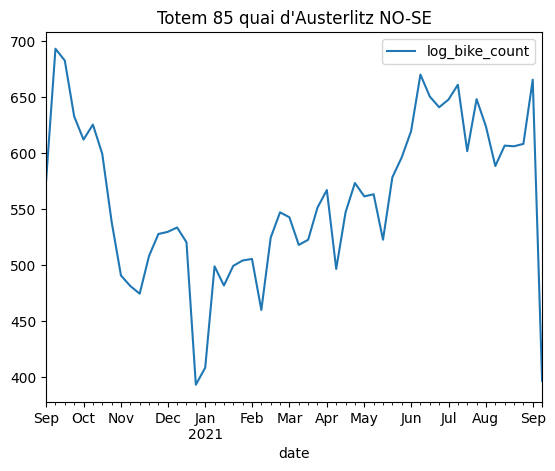

<Figure size 400x800 with 0 Axes>

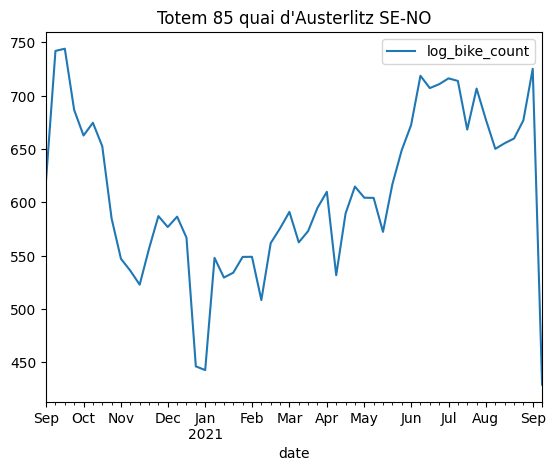

<Figure size 400x800 with 0 Axes>

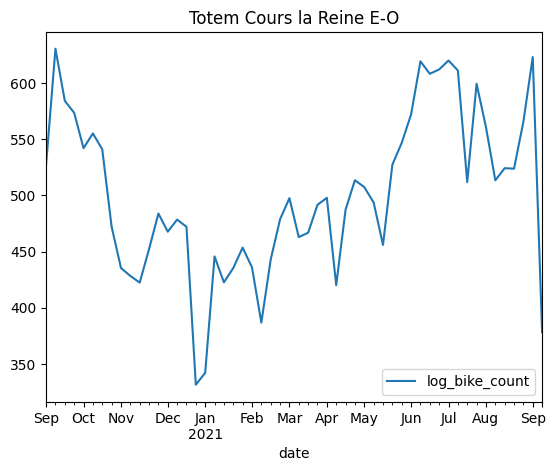

<Figure size 400x800 with 0 Axes>

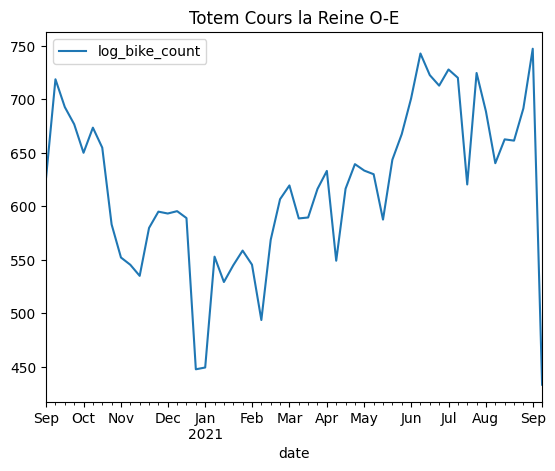

<Figure size 400x800 with 0 Axes>

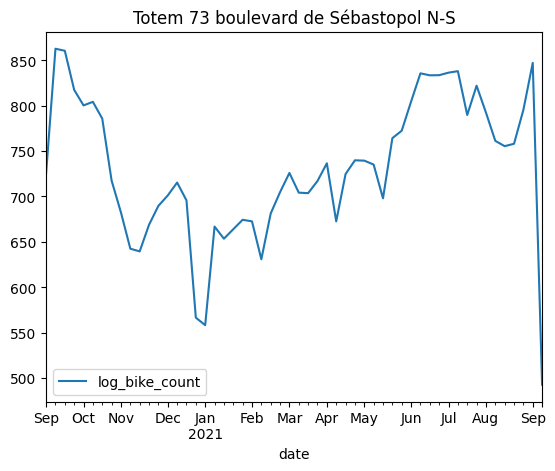

<Figure size 400x800 with 0 Axes>

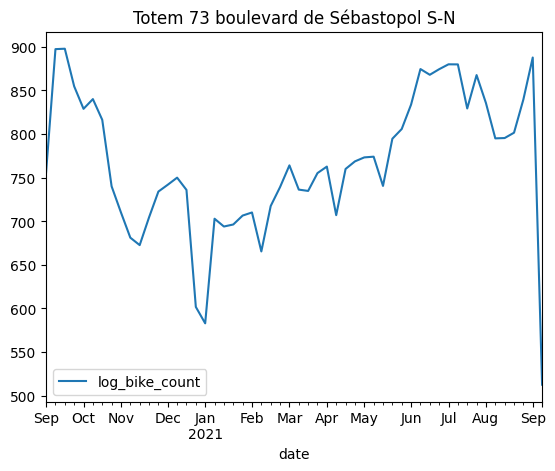

<Figure size 400x800 with 0 Axes>

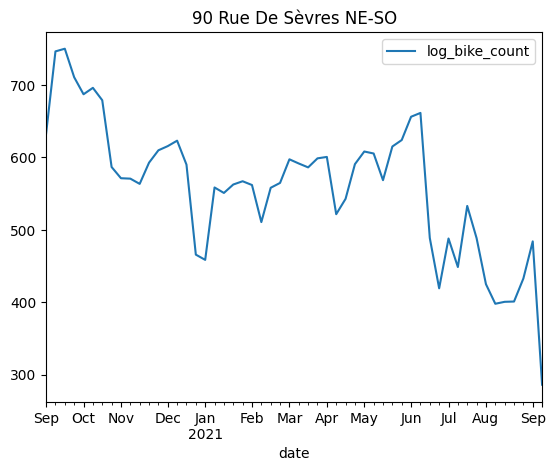

<Figure size 400x800 with 0 Axes>

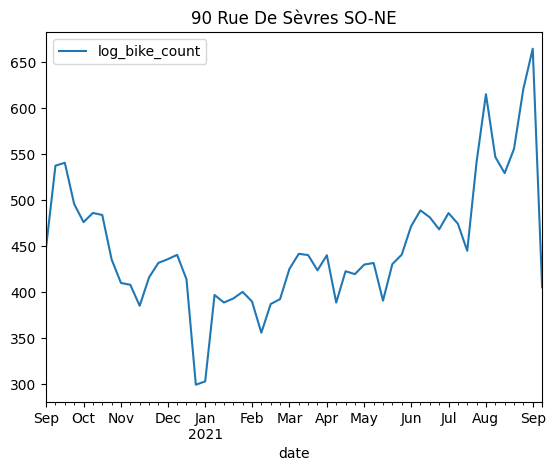

<Figure size 400x800 with 0 Axes>

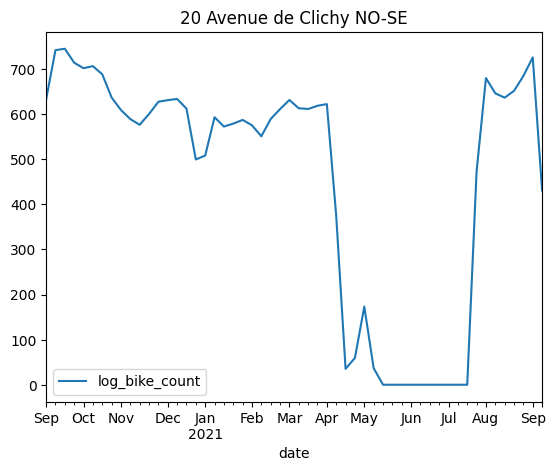

<Figure size 400x800 with 0 Axes>

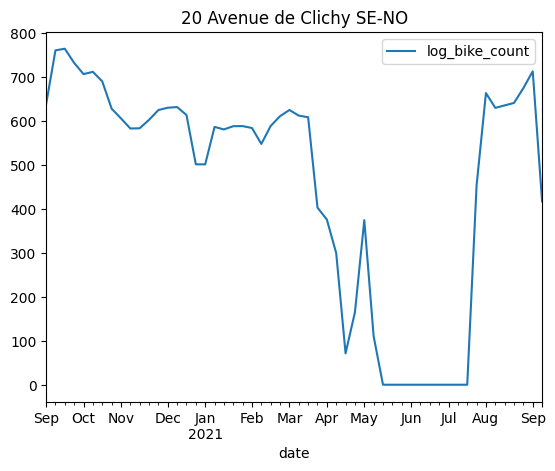

<Figure size 400x800 with 0 Axes>

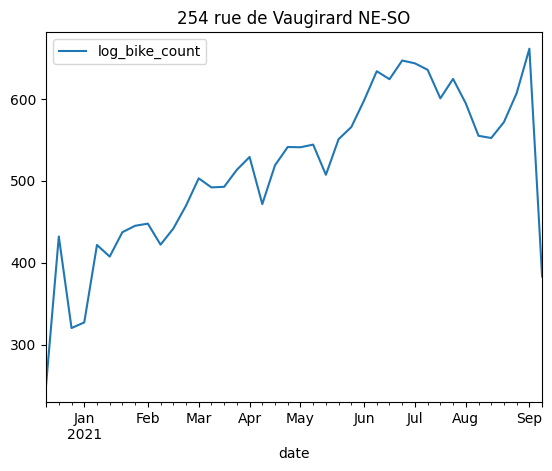

<Figure size 400x800 with 0 Axes>

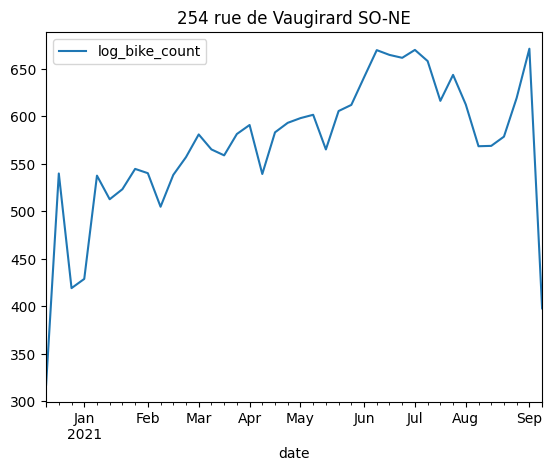

In [38]:
for counter in data["counter_name"].unique():
   mask = data["counter_name"] == counter
   plt.figure(figsize=(4, 8))
   data[mask].groupby(pd.Grouper(freq="1w", key="date"))[
   ["log_bike_count"]
   ].sum().plot()
   plt.title(counter)